# Урок 2

# Линейное пространство. Основные понятия. Часть 2

## Евклидово пространство

__Определение__

Линейное пространство над полем вещественных чисел называется _евклидовым пространством_, если на нем введено правило, согласно которому каждой упорядоченной паре векторов $x$ и $y$ поставлено в соответствие вещественное число, называемое _скалярным произведением_ и обозначаемое символом $(x, y)$.

При этом указанное правило должно подчиняться четырем аксиомам:<br>
1) $(x,y)=(y,x);$<br>
2) $(\lambda x, y)=\lambda(x, y);$<br>
3) $(x_{1}+x_{2},y)=(x_{1},y)+(x_{2},y);$<br>
4) $(x, x)\geqslant0$, причем $(x,x)=0\Leftrightarrow x=0.$



__Пример__

Из школьной программы известно, что в стандартном понимании в трехмерном пространстве скалярное произведение двух векторов определяется как произведение длин этих векторов на косинус угла между ними (см. рис.):

$$(x, y) = \left|x\right|\cdot\left|y\right|\cdot cos\alpha.$$

In [1]:
# запустите последовательно код в ячейках, чтобы отобразить иллюстрации
import matplotlib.pyplot as plt

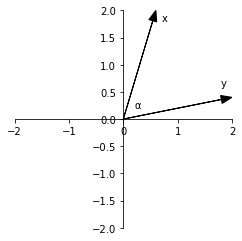

In [2]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.axis('scaled')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

ax.arrow(0, 0, 0.6, 2, head_width=0.15, head_length=0.2, length_includes_head=True, facecolor='black')
ax.arrow(0, 0, 2, 0.4, head_width=0.15, head_length=0.2, length_includes_head=True, facecolor='black')
ax.annotate("y", xy=(1.8, 0.6))
ax.annotate("x", xy=(0.7, 1.8))
ax.annotate("\u03B1", xy=(0.2, 0.2))

plt.show()

Данное правило удовлетворяет введенным ранее аксиомам скалярного произведения. Таким образом, приведенное в примере пространство всех свободных векторов с так определенным скалярным произведением является евклидовым пространством.

__Пример__

Примером евклидова пространства будет выступать $n$-мерное линейное пространство $\mathbb{R}^{n}$ упорядоченных совокупностей $n$ вещественных чисел, скалярное произведение векторов $x=(a_{1},a_{2},...,a_{n})$ и $y=(b_{1},b_{2},...,b_{n})$ на котором определено как

$$(x,y)=a_{1}b_{1}+a_{2}b_{2}+...+a_{n}b_{n}.$$

Очевидно, что определенные ранее аксиомы выполняются для этого правила.

То есть скалярное произведение между двумя векторами $x=(1,2,3)$ и $y=(4,5,6)$, принадлежащими пространству $\mathbb{R}^{3}$, будет равняться 

$$(x,y)=1\cdot4+2\cdot5+3\cdot6=4 + 10 + 18=32.$$

В Python cкалярное произведение двух векторов можно вычислять с помощью функции `numpy.dot(a, b)` или метода `vec1.dot(vec2)`, где `vec1` и `vec2` — исходные векторы.

In [3]:
import numpy as np

In [4]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(f'Скалярное произведение a и b:\n{np.dot(a, b)}')

Скалярное произведение a и b:
32


Введем теперь такие важные понятия, как _метрика_, _норма_ (или _длина_) вектора и _угол_ между векторами в произвольном евклидовом пространстве. Для этого нужно ввести понятие _линейных нормированных пространств._

### Линейные нормированные пространства

Для обобщения понятия длины вектора используется понятие _нормы_.

__Определение__

Линейное пространтсво $R$ называется _нормированным_, если на нем введено правило, согласно которому каждому элементу $x$ ставится в соответствие число, называемое _нормой_ (или _длиной_) этого элемента и обозначаемое символом $\left\|x\right\|$.

Оно должно подчиняться трем аксиомам:<br>
1) $\left\|x\right\|\geqslant0$, причем $\left\|x\right\|=0\Leftrightarrow x=0;$<br>
2) $\left\|\lambda x\right\|$ = $|\lambda|\left\|x\right\|$;<br>
3) $\left\| x + y \right\| \leqslant \left\|x\right\|$ + $\left\|y\right\|$.

Последняя аксиома называется _неравенством треугольника_, или _неравенством Минковского_.

__Примеры__

Существует много способов определния нормы.

- $p$-норма (норма Гёльдера) для вектора $x = (x_{1}, \dots, x_{n}) \in \mathbb{R}^{n}$ вычисляется по формуле:

$$\left\| x \right\|_{p} = \left( \sum_{i} \left| x_{i} \right|^{p} \right)^{1 / p},~p \geqslant 1.$$

В частных случаях при:

- $p = 1$ получаем $\ell_{1}$ норму (_манхэттенская норма_, или _манхэттенское расстояние_)

$$\left\|x\right\|_{1} = \sum_{i}|x_{i}|;$$

- $p = 2$ получаем $\ell_{2}$ норму (_евклидова норма_, наиболее часто используемая)

$$\left\|x\right\|_{2} = \sqrt{\sum_{i}|x_{i}|^{2}}.$$

Определим норму вектора вручную и при помощи Python.

Для выполнения операций линейной алгебры в Python используется модуль `numpy.linalg`. Для вычисления различных норм используется функция `numpy.linalg.norm(x, ord=None)`, где `x` — исходный вектор, `ord` — параметр, обозначенный выше как $p$ и определяющий норму.

In [5]:
from numpy.linalg import norm

Зададим вектор $a=(1,2,-3)$:

In [6]:
a = np.array([1, 2, -3])

Определим манхэттенскую норму вектора $a$:

$$\left\|x\right\|_{1} = |1|+|2|+|-3|=6.$$

In [7]:
print(f'l1 норма вектора a:\n{norm(a, ord=1)}')

l1 норма вектора a:
6.0


Определим евклидову норму вектора $a$:

$$\left\|x\right\|_{2} = \sqrt{1^{2}+2^{2}+(-3)^{2}}=\sqrt{14}.$$

In [8]:
print(f'l2 норма вектора a:\n{norm(a, ord=2)}')

l2 норма вектора a:
3.7416573867739413


Можем убедиться, что различные нормы дают разные значения для одного и того же вектора.

__Теорема__

Всякое евклидово пространство является нормированным, если норму любого элемента $x$ в нем определить как

$$\left\|x\right\| = \sqrt{(x,x)}.$$

Для любых $x,y$, принадлежащих евклидову пространству $E$ с так определенной нормой, имеет место неравенство 

$$|(x,y)|\leqslant\left\|x\right\| \left\|y\right\|.$$

Это выражение называется _неравенством Коши — Буняковского_.

Докажем его. Возьмем вещественный элемент $\lambda$ и рассмотрим элемент $x- \lambda y\in E$. 

Согласно аксиоме 4 для евклидова пространства, 

$$0\leqslant(x-\lambda y, x-\lambda y)=(x,x)-2(x,y)\lambda +(y,y)\lambda^{2}.$$

Полученный квадратный трехчлен относительно $\lambda$ является уравнением параболы. Геометрически тот факт, что он больше или равен нулю при всех $\lambda$, означает, что квадратное уравнение 

$$(y,y)\lambda^{2}-2(x,y)\lambda +(x,x)=0$$

либо вовсе не имеет корней, либо имеет один корень. А это возможно только тогда, когда дискриминант такого уравнения меньше или равен нулю:

$$D=4(x,y)^{2}-4(x,x)(y,y)\leqslant0,$$

из чего следует, что

$$(x,y)^{2}\leqslant\left\|x\right\|^{2}\left\|y\right\|^{2}.$$

Неравенство Коши — Буняковского доказано.

__Определение__

В любом вещественном евклидовом пространстве можно ввести понятие _угла_ между двумя произвольными элементами $x$ и $y$. Углом $\varphi \in [0, \pi]$ между этими элементами назовем угол, косинус которого определяется соотношением

$$cos\varphi = \frac{(x,y)}{\left \|x\right \|\cdot\left \|y\right \|}.$$

__Пример__

Определим угол между векторами $a=(1,2,3)$, $b=(4,5,6)$.

In [9]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

$$cos\varphi = \frac{1\cdot4+2\cdot5+3\cdot6}{\sqrt{1^{2}+2^{2}+3^{2}}\sqrt{4^{2}+5^{2}+6^{2}}}=\frac{32}{\sqrt{1078}}\approx 0.97$$

In [10]:
cos_phi = np.dot(a, b) / norm(a) / norm(b)
print(f'Косинус угла между a и b: {cos_phi:.2f}')
print(f'Угол между a и b: {np.arccos(cos_phi):.2f}')

Косинус угла между a и b: 0.97
Угол между a и b: 0.23


Два произвольных элемента $x$ и $y$ евклидова пространства $E$ называются _ортогональными_, если их скалярное произведение равно нулю (в этом случае косинус угла $\varphi$ между этими элементами будет равен нулю).

### Метрические пространства

Понятие расстояния в контексте машинного обучения обобщается с помощью _метрики_.

__Определение__

Пара $(E, d)$, где $E$ — множество, а $d: E\times E \rightarrow \mathbb{R}$ — вещественнозначная функция, называется _метрическим пространством_, если для всех $x,y,z\in E$ выполняются условия:<br>
1) $d(x,y)=d(y,x);$<br>
2) $d(x,x)=0$; $d(x,y)>0$, если $x \neq y$;<br>
3) $d(x,z) \leqslant d(x,y) + d(y,z)$ (неравенство треугольника).

Функция $d$ с такими свойствами иногда обозначается  $\left | x-y \right |$ и называется _метрикой_, а $d(x,y)$ — _расстоянием между точками $x,y$_.

Любое нормированное пространство можно превратить в метрическое, определив $d(x,y) = \left\|x-y\right\|$.

__Пример__

Как и в случае нормы, существует ряд различных методик определения метрики, например, _евклидова метрика_
 
$$d_{2}(x,y) = \sqrt{\sum_{i}(x_{i}-y_{i})^{2}}$$

и _манхэттенская метрика_:

$$d_{1}(x,y) = \sum_{i}|x_{i}-y_{i}|.$$

Определим расстояние между векторами $a=(1,2,3)$, $b=(4,5,6)$.

In [11]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

Один способ — посчитать метрику как $\left\|a-b\right\|$, как было сказано выше:

In [12]:
print(f'l1 расстояние между векторами a и b:\n{norm(a - b, ord=1)}')

l1 расстояние между векторами a и b:
9.0


In [13]:
print(f'l2 расстояние между векторами a и b:\n{norm(a - b, ord=2)}')

l2 расстояние между векторами a и b:
5.196152422706632


Второй способ посчитать расстояние — использовать функцию `scipy.spatial.distance.cdist(XA, XB, metric='euclidean', p=2, ...)` из модуля SciPy, предназначенного для выполнения научных расчетов. Параметры `XA, XB` — исходные векторы, а `metric` и `p` задают метрику расстояния.

Эта функция требует, чтобы размерность массивов `XA` и `XB` была как минимум двумерная, поэтому для использования этой функции исходные векторы необходимо преобразовать в _вектор-строки_ (матрица размера $1\times m$) или _вектор-столбцы_ (матрица размера $n\times1$). Матрицы как струкутры данных будут рассмотрены нами в следующих уроках.

Есть различные способы преобразования вектора в вектор-строку или вектор-столбец. Первый — использовать метод `array.reshape(shape)`, где кортеж `shape` задает размерность получаемого массива.

In [14]:
print(f'Вектор а: {a}')
print(f'Его размерность: {a.shape}')
print(f'Вектор b: {b}')
print(f'Его размерность: {b.shape}')

a = a.reshape((1, 3))
b = b.reshape((1, 3))

print('\nПосле применения метода reshape:')
print(f'Вектор-строка a: {a}')
print(f'Его размерность: {a.shape}')
print(f'Вектор-строка b: {b}')
print(f'Его размерность: {b.shape}')

Вектор а: [1 2 3]
Его размерность: (3,)
Вектор b: [4 5 6]
Его размерность: (3,)

После применения метода reshape:
Вектор-строка a: [[1 2 3]]
Его размерность: (1, 3)
Вектор-строка b: [[4 5 6]]
Его размерность: (1, 3)


In [15]:
from scipy.spatial.distance import cdist
print(f'Манхэттенское расстояние между a и b:\n{cdist(a, b, metric="cityblock")}')

Манхэттенское расстояние между a и b:
[[9.]]


Еще один способ преобразования вектора для получения возможности определения расстояния при помощи cdist — использование функции `np.newaxis`.

In [16]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(f'Преобразование вектора a в вектор-строку:\n{a[np.newaxis, :]}')
print(f'Полученная размерность:{a[np.newaxis, :].shape}')

print(f'Преобразование вектора b в вектор-столбец:\n{b[:, np.newaxis]}')
print(f'Полученная размерность:{b[:, np.newaxis].shape}')

Преобразование вектора a в вектор-строку:
[[1 2 3]]
Полученная размерность:(1, 3)
Преобразование вектора b в вектор-столбец:
[[4]
 [5]
 [6]]
Полученная размерность:(3, 1)


In [17]:
print(f'Евклидово расстояние между a и b:\n{cdist(a[np.newaxis, :], b[np.newaxis, :], metric="euclidean")}')

Евклидово расстояние между a и b:
[[5.19615242]]


### Базис в евклидовом пространстве

Как было сказано ранее, в евклидовом пространстве $E$ элементы $x$ и $y$ называются _ортогональными_, если

$$(x,y)=0.$$

То есть можно заключить, что данное равенство означает, что угол между векторами должен равняться $90^{\circ}$. Это же справедливо и для произвольного евклидова пространства, а также отсюда следует, что нулевой элемент евклидова пространства ортогонален любому элементу.

__Определение.__ В конечномерном евклидовом пространстве базис $\{e_{1},e_{2},...,e_{n}\}$ называется ортонормированным, если 

$(e_{i}, e_{j})=0$ $\forall$ $i\neq j$ и $(e_{i},e_{i})=1$ $\forall$ $i\in[1, n].$

Это означает, что ортонормированный базис является ортогональным и состоит из векторов единичной длины.

Часто на практике возникает необходимость произвести переход от произвольного базиса $\{a_{1}, a_{2}, ...,a_{n}\}$ в определенном евклидовом пространстве к ортонормированному. Для этого нужно сперва _ортогонализировать_ его, а затем _нормировать_:

- первая часть называется процесс ортогонализации Грама-Шмидта. Она производится следующим образом.

    Возьмем вначале $e_{1}=a_{1}$.<br>
    Второй элемент нового ортогонального базиса будем искать в виде $e_{2}=a_{2}+\alpha_{1}e_{1}.$
    
    $\alpha_{1}$ подберем из условия ортогонального базиса $(e_{1}, e_{2})=0$. Из этого следует, что 
    
    $$(e_{1}, a_{2}+\alpha_{1}e_{1})=(e_{1}, a_{2})+(e_{1},\alpha_{1}e_{1})=0,$$
    
    
$$\alpha_{1}=-\frac{(e_{1}, a_{2})}{(e_{1},e_{1})}.$$
    

    
    

    
   k-й элемент нового базиса будет иметь вид 
   
   $$e_{k}=a_{k}+\sum_{j=1}^{k-1}\alpha_{j}e_{j},$$
    
   а $\alpha_{i}$ —
    
   $$\alpha_{i}=-\frac{(e_{i}, a_{k})}{(e_{i},e_{i})}, i\in[1, k-1].$$
    
   Ортогонализация продолжается до окончания множества исходных элементов, после чего следует вторая часть:
    
- элементы $e_{i}$ достаточно пронормировать для получения ортонормированного базиса:
    
    $$e_{i}'=\frac{e_{i}}{|e_{i}|}.$$

Примером ортонормированного базиса может служить декартов прямоугольный базис евклидова пространства $E^{n}$:

$$e_{1}=(1,0,0,...,0),$$
$$e_{2}=(0,1,0,...,0),$$
$$...$$
$$e_{n}=(0,0,0,...,1).$$

Рассмотрим плюсы ортонормированного базиса по сравнению с обычным неортогональным.

Возьмем некоторое пространство с ортонормированным базисом $\{e_{1},e_{2},...,e_{n}\}$, выберем два произвольных вектора $x$ и $y$ в нем и разложим их по базису: 

$$x=\xi_{1} e_{1}+ \xi_{2} e_{2}+...+\xi_{n} e_{n},$$
$$y=\eta_{1} e_{1}+ \eta_{2} e_{2}+...+\eta_{n} e_{n}.$$

Коэффициенты $\xi_{i}$ и $\eta_{i}$ будут координатами соответствующих векторов в существующем базисе. Вычислим их скалярное произведение:

$$(x,y)=(\xi_{1} e_{1}+ \xi_{2} e_{2}+...+\xi_{n} e_{n},\eta_{1} e_{1}+ \eta_{2} e_{2}+...+\eta_{n} e_{n}).$$

Учитывая свойства ортонормированного базиса (обнуление всех скалярных произведений $(e_{i}, e_{j})=0$) и $(e_{i}, e_{i})=1$, получим, что 

$$(x,y)=\xi_{1}\eta_{1} + \xi_{2} \eta_{2}+...+\xi_{n}\eta_{n}.$$

Таким образом, _в евклидовом пространстве с ортонормированным базисом скалярное произведение двух векторов равняется сумме произведений соответствующих координат этих векторов в этом базисе_.

Также особенностью ортонормированного базиса является то, что _координаты произвольного элемента относительно ортонормированного базиса равны скалярным произведениям этого элемента на соответствующие базисные элементы._

## Практическое задание

__1.__ Найти скалярное произведение векторов $x, y \in \mathbb{R}$:<br>
а) $x=(0,-3, 6),~y=(-4, 7, 9);$<br>
б) $x=(7, -4, 0, 1),~y=(-3, 1, 11, 2).$

__2.__ Найти нормы векторов $(4, 2, 4)$ и $(12, 3, 4)$ и угол между ними.


__3.__ Будет ли линейное пространство евклидовым, если за скалярное произведение принять:<br>
а) произведение длин векторов;<br>
б) утроенное обычное скалярное произведение векторов?
   
   
__4.__ Какие из нижеперечисленных векторов образуют ортонормированный базис в линейном пространстве $\mathbb{R}^{3}$:<br>
а) $(1,0,0),(0,0,1);$ <br>
б) $(1/\sqrt{2},-1/\sqrt{2},0),(1/\sqrt{2},1/\sqrt{2},0), (0,0,1);$<br>
в) $(1/2, -1/2, 0), (0, 1/2, 1/2), (0,0,1);$<br>
г) $(1,0,0),(0,1,0),(0,0,1)?$ 

## Литература

1. Ильин В. А., Позняк Э. Г. Линейная алгебра: Учеб. для вузов. — 6-е изд. — М.: Физматлит, 2005.
2. Кострикин А. И., Манин Ю. И. Линейная алгебра и геометрия. Учеб. пособие для вузов. — 2-е изд. — М.: Наука, Главная редакция физико-математической литературы, 1986.
3. Шерстнева А. И., Янущик О. В. Линейные пространства. Линейные операторы: учебное пособие. Томск: Изд-во Томского политехнического университета, 2010.

## Дополнительные материалы

1. [Манхэттенская метрика](https://ru.wikipedia.org/wiki/Расстояние_городских_кварталов).

2. [Евклидова метрика](https://ru.wikipedia.org/wiki/Евклидова_метрика).

3. [Скалярное произведение в Python](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html#matrix-and-vector-products).

4. [Документация по нормам в NumPy](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html)

5. [Документация по метрикам в SciPy](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.spatial.distance.cdist.html)